In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [ ]:
!kaggle datasets download rahmasleam/bird-speciees-dataset

Dataset URL: https://www.kaggle.com/datasets/rahmasleam/bird-speciees-dataset
License(s): apache-2.0
 98% 15.0M/15.2M [00:00<00:00, 26.3MB/s]
100% 15.2M/15.2M [00:00<00:00, 18.1MB/s]


In [ ]:
#!unzip /content/bird-speciees-dataset.zip

Archive:  /content/bird-speciees-dataset.zip
  inflating: Bird Speciees Dataset/AMERICAN GOLDFINCH/001.jpg  
  inflating: Bird Speciees Dataset/AMERICAN GOLDFINCH/002.jpg  
  inflating: Bird Speciees Dataset/AMERICAN GOLDFINCH/003.jpg  
  inflating: Bird Speciees Dataset/AMERICAN GOLDFINCH/004.jpg  
  inflating: Bird Speciees Dataset/AMERICAN GOLDFINCH/005.jpg  
  inflating: Bird Speciees Dataset/AMERICAN GOLDFINCH/006.jpg  
  inflating: Bird Speciees Dataset/AMERICAN GOLDFINCH/007.jpg  
  inflating: Bird Speciees Dataset/AMERICAN GOLDFINCH/008.jpg  
  inflating: Bird Speciees Dataset/AMERICAN GOLDFINCH/009.jpg  
  inflating: Bird Speciees Dataset/AMERICAN GOLDFINCH/010.jpg  
  inflating: Bird Speciees Dataset/AMERICAN GOLDFINCH/011.jpg  
  inflating: Bird Speciees Dataset/AMERICAN GOLDFINCH/012.jpg  
  inflating: Bird Speciees Dataset/AMERICAN GOLDFINCH/013.jpg  
  inflating: Bird Speciees Dataset/AMERICAN GOLDFINCH/014.jpg  
  inflating: Bird Speciees Dataset/AMERICAN GOLDFINCH/015.j

In [ ]:
import os
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# import Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
!pip install tensorflow

# DATA PREPROCESSING

In [ ]:
#Read Data and store it in dataframe

In [ ]:
# Define the dataset path
data_dir = "/content/Bird Speciees Dataset"  # Update with the actual dataset path

# Create an empty list to store image paths and labels
image_paths = []
label = []

# Loop through each subfolder (bird species)
for bird_species in os.listdir(data_dir):
    species_path = os.path.join(data_dir, bird_species)

    # Check if it's a directory
    if os.path.isdir(species_path):
        # Loop through each image in the subfolder
        for img_file in os.listdir(species_path):
            if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Filter image files
                image_paths.append(os.path.join(species_path, img_file))
                label.append(bird_species)  # Folder name as label

# Create DataFrame
df = pd.DataFrame({'image_path': image_paths, 'labels': label})

# Shuffle the DataFrame
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display DataFrame
display(df.head())

# Check dataset size
print(f"Total Images: {len(df)}")
print(f"Unique Bird Species: {df['labels'].nunique()}")
print(f"Classes: {df['labels'].unique()}")


image_path              labels
0  /content/Bird Speciees Dataset/AMERICAN GOLDFI...  AMERICAN GOLDFINCH
1    /content/Bird Speciees Dataset/BARN OWL/100.jpg            BARN OWL
2  /content/Bird Speciees Dataset/AMERICAN GOLDFI...  AMERICAN GOLDFINCH
3  /content/Bird Speciees Dataset/CARMINE BEE-EAT...   CARMINE BEE-EATER
4  /content/Bird Speciees Dataset/EMPEROR PENGUIN...     EMPEROR PENGUIN

Total Images: 811
Unique Bird Species: 6
Classes: ['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'EMPEROR PENGUIN'
 'DOWNY WOODPECKER' 'FLAMINGO']


In [ ]:
# Check the number of unique classes (bird species)
num_classes = df['labels'].nunique()
display(f"Number of unique bird species: {num_classes}")

# Check the total count of images per class
label_counts = df['labels'].value_counts()
print("\nImage count per class:")
display(label_counts)

# Check the overall DataFrame shape
print(f"\nTotal dataset size: {df.shape}")


'Number of unique bird species: 6'


Image count per class:


labels
AMERICAN GOLDFINCH    143
EMPEROR PENGUIN       139
DOWNY WOODPECKER      137
FLAMINGO              132
CARMINE BEE-EATER     131
BARN OWL              129
Name: count, dtype: int64


Total dataset size: (811, 2)


# Visualize Bird Species

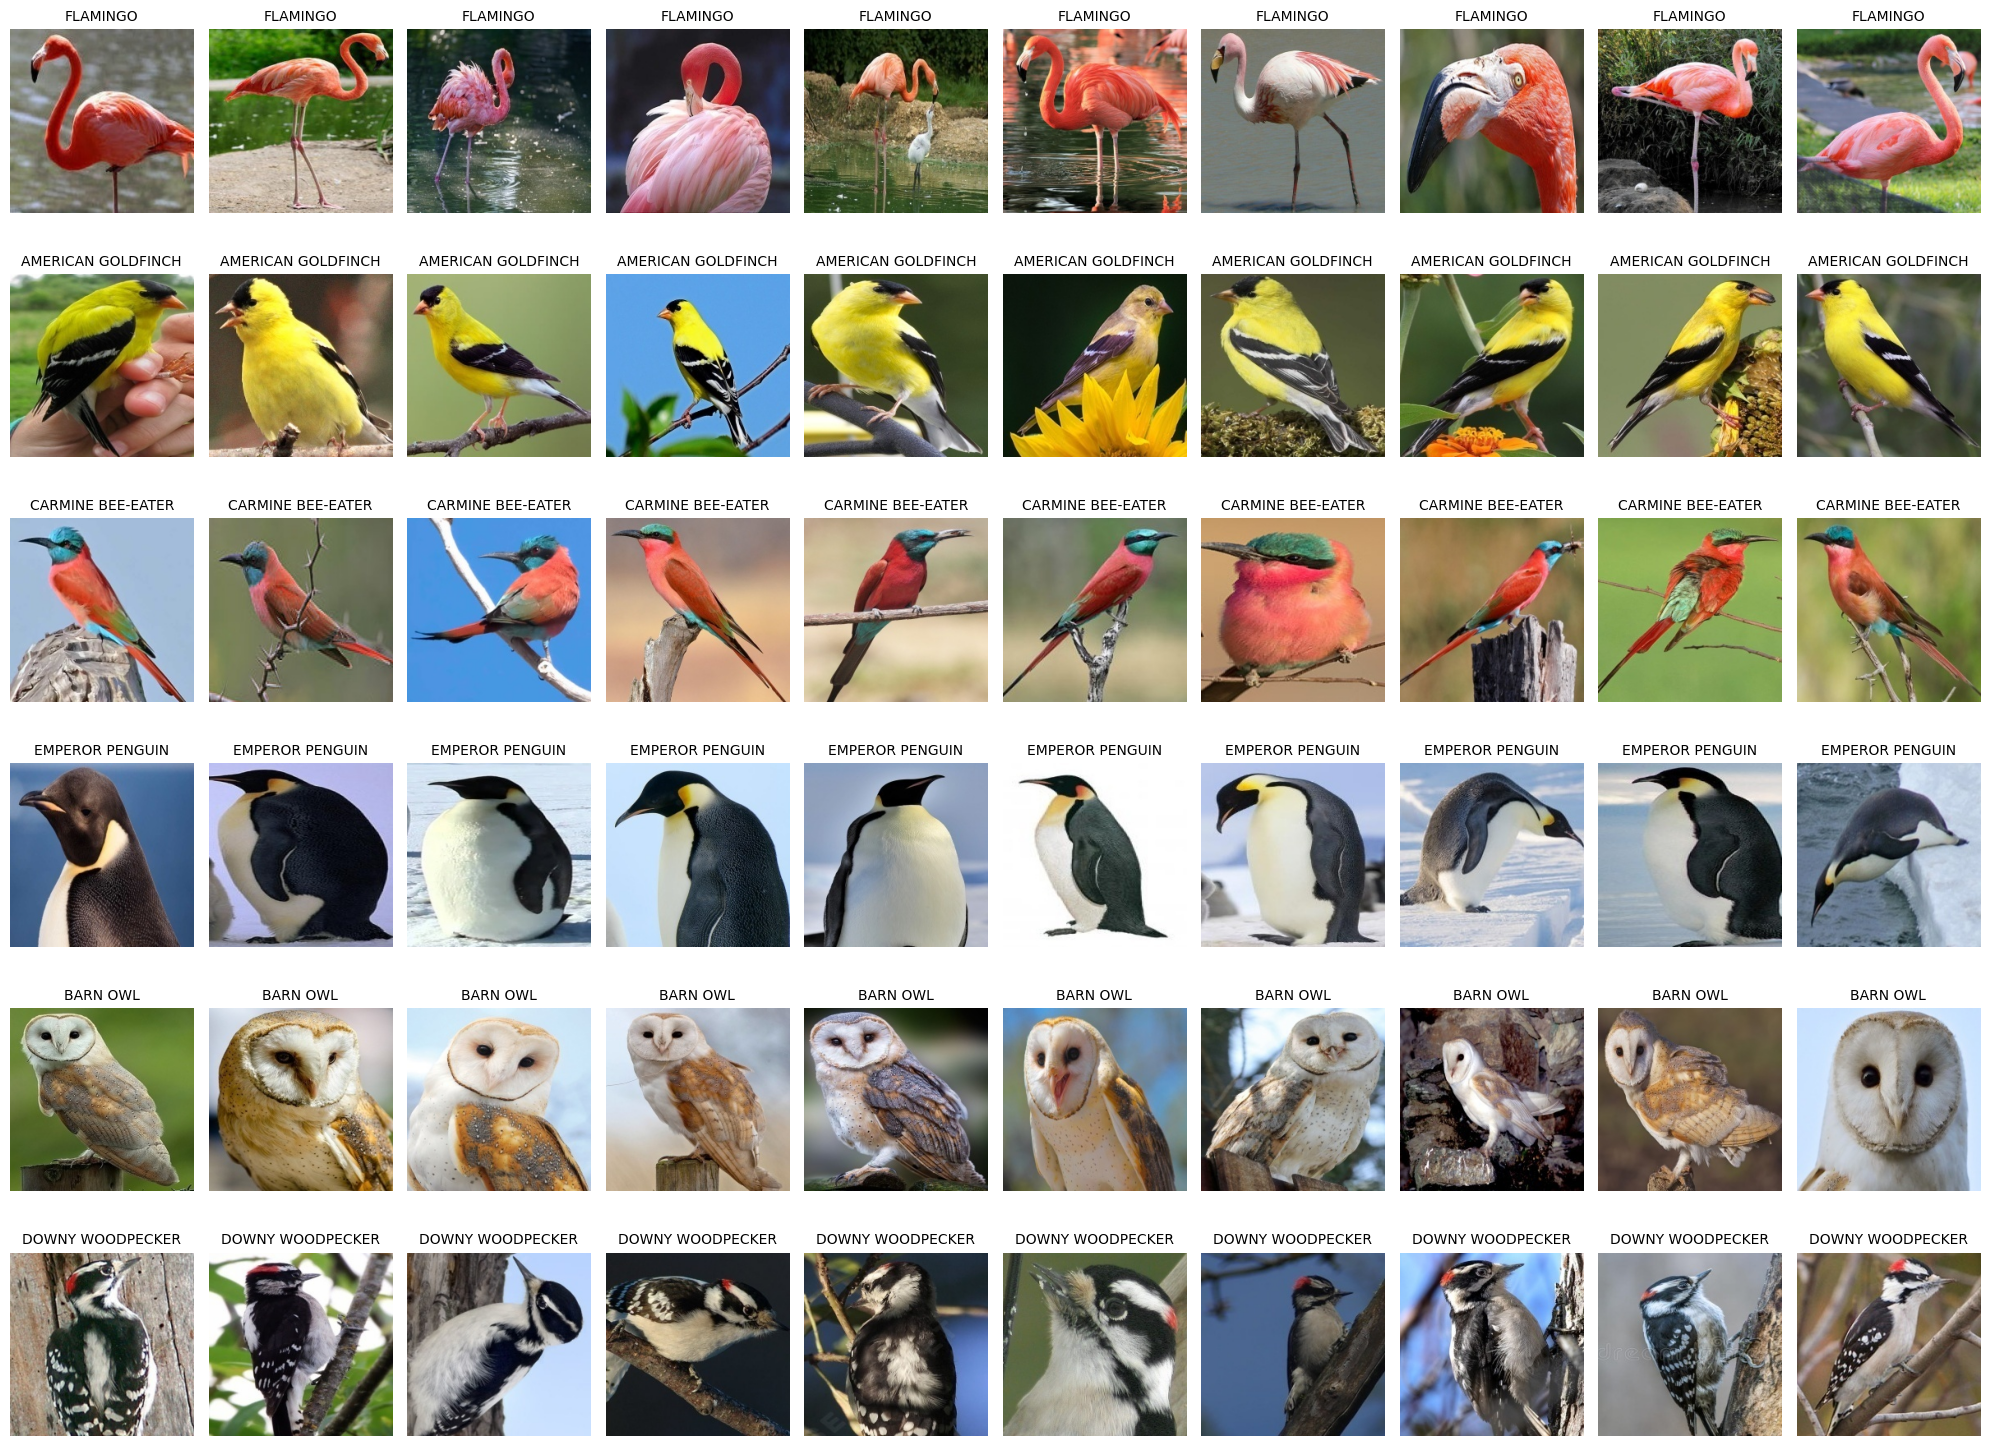

In [ ]:
# Define dataset path
data_dir = "/content/Bird Speciees Dataset"  # Update with your dataset path

# Get all class (bird species) names
bird_species = os.listdir(data_dir)

# Set number of images to display per class
num_images = 10

# Define figure size
fig, axes = plt.subplots(len(bird_species), num_images, figsize=(20, 15))

# Loop through each bird species
for i, species in enumerate(bird_species):
    species_path = os.path.join(data_dir, species)
    images = os.listdir(species_path)

    # Select 10 random images
    sample_images = random.sample(images, min(num_images, len(images)))

    # Display images
    for j, img_name in enumerate(sample_images):
        img_path = os.path.join(species_path, img_name)
        img = Image.open(img_path)
        axes[i, j].imshow(img)
        axes[i, j].axis("off")

        # Set bird species name as title
        axes[i, j].set_title(species.replace("_", " "), fontsize=10)

    # Add class name on the leftmost side
    axes[i, 0].set_ylabel(species.replace("_", " "), rotation=90, fontsize=14, labelpad=10)

# Adjust layout and show the images
plt.tight_layout()
plt.show()


In [ ]:
# Splitting dataset
strat = df['labels']
train_df, dummy_df = train_test_split(df, test_size=.3, shuffle=True, stratify=strat, random_state=123)

# valid and test dataframe
strat = dummy_df['labels']
valid_df, test_df = train_test_split(dummy_df, test_size=.5, shuffle=True, stratify=strat, random_state=123)

In [ ]:
train_df.head()

image_path             labels
42   /content/Bird Speciees Dataset/CARMINE BEE-EAT...  CARMINE BEE-EATER
76     /content/Bird Speciees Dataset/BARN OWL/117.jpg           BARN OWL
704  /content/Bird Speciees Dataset/EMPEROR PENGUIN...    EMPEROR PENGUIN
389    /content/Bird Speciees Dataset/BARN OWL/034.jpg           BARN OWL
283  /content/Bird Speciees Dataset/EMPEROR PENGUIN...    EMPEROR PENGUIN

In [ ]:
dummy_df.head()

image_path              labels
418  /content/Bird Speciees Dataset/DOWNY WOODPECKE...    DOWNY WOODPECKER
695  /content/Bird Speciees Dataset/DOWNY WOODPECKE...    DOWNY WOODPECKER
477  /content/Bird Speciees Dataset/AMERICAN GOLDFI...  AMERICAN GOLDFINCH
6    /content/Bird Speciees Dataset/AMERICAN GOLDFI...  AMERICAN GOLDFINCH
164  /content/Bird Speciees Dataset/EMPEROR PENGUIN...     EMPEROR PENGUIN

In [ ]:
valid_df.head()

image_path             labels
481    /content/Bird Speciees Dataset/BARN OWL/026.jpg           BARN OWL
173  /content/Bird Speciees Dataset/EMPEROR PENGUIN...    EMPEROR PENGUIN
183  /content/Bird Speciees Dataset/DOWNY WOODPECKE...   DOWNY WOODPECKER
290    /content/Bird Speciees Dataset/BARN OWL/113.jpg           BARN OWL
223  /content/Bird Speciees Dataset/CARMINE BEE-EAT...  CARMINE BEE-EATER

In [ ]:
test_df.head()

image_path              labels
278  /content/Bird Speciees Dataset/EMPEROR PENGUIN...     EMPEROR PENGUIN
761  /content/Bird Speciees Dataset/DOWNY WOODPECKE...    DOWNY WOODPECKER
537  /content/Bird Speciees Dataset/AMERICAN GOLDFI...  AMERICAN GOLDFINCH
271    /content/Bird Speciees Dataset/FLAMINGO/129.jpg            FLAMINGO
597  /content/Bird Speciees Dataset/CARMINE BEE-EAT...   CARMINE BEE-EATER

In [ ]:
print(f"Number of Training dataset: {len(train_df)}\nNumber of Validation dataset: {len(valid_df)}\nNumber of Testing dataset: {len(test_df)}")

Number of Training dataset: 567
Number of Validation dataset: 122
Number of Testing dataset: 122


# Create image data generator


In [ ]:
# crobed image size
batch_size = 8
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe(train_df, x_col='image_path', y_col='labels', target_size=img_size, class_mode='categorical',
                                       color_mode='rgb', shuffle= True, batch_size=batch_size)

valid_gen = ts_gen.flow_from_dataframe(valid_df, x_col='image_path', y_col='labels', target_size=img_size, class_mode='categorical',
                                      color_mode='rgb', shuffle=True, batch_size=batch_size)

test_gen = ts_gen.flow_from_dataframe(test_df, x_col='image_path', y_col='labels', target_size=img_size, class_mode='categorical',
                                     color_mode='rgb', shuffle=False, batch_size=batch_size)

Found 567 validated image filenames belonging to 6 classes.
Found 122 validated image filenames belonging to 6 classes.
Found 122 validated image filenames belonging to 6 classes.


In [ ]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys()))

In [ ]:
def load_model():
    model = Sequential([
        Conv2D(8, (3,3), activation='relu', padding='same', input_shape = img_shape),
        MaxPooling2D((3,3)),

        Conv2D(16, (3,3), activation='relu', padding='same'),
        MaxPooling2D((2,2)),

        Conv2D(32, (3,3), activation='relu', padding='same'),
        Conv2D(32, (3,3), activation='relu', padding='same'),
        MaxPooling2D((2,2)),

        Conv2D(64, (3,3), activation='relu', padding='same'),
        Conv2D(64, (3,3), activation='relu', padding='same'),
        Conv2D(64, (3,3), activation='relu', padding='same'),
        MaxPooling2D((2,2)),

        Flatten(),

        Dense(128, activation='relu'),
        Dense(256, activation='relu'),
        Dense(class_count, activation='softmax')
    ])

    model.compile(Adamax(learning_rate=.0005), loss = 'categorical_crossentropy', metrics=['acc'])

    return model

early_stopping = EarlyStopping(
    patience=10,
    min_delta=0,
    mode='min',
    monitor='val_loss',
    verbose=0,
    restore_best_weights=True,
    baseline=None
)

plateau = ReduceLROnPlateau(
    patience=4,
    mode='min',
    monitor='val_loss',
    factor=.2,
    verbose=0
)


cnn_model = load_model()
history = cnn_model.fit(x= train_gen, verbose=1, validation_data=valid_gen,
                        epochs=1000, callbacks=[early_stopping, plateau])

Epoch 1/1000
71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - acc: 0.2305 - loss: 2.8468 - val_acc: 0.4508 - val_loss: 1.3885 - learning_rate: 5.0000e-04
Epoch 2/1000
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc: 0.5982 - loss: 1.1607 - val_acc: 0.6148 - val_loss: 0.9444 - learning_rate: 5.0000e-04
Epoch 3/1000
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc: 0.7569 - loss: 0.6880 - val_acc: 0.7541 - val_loss: 0.6263 - learning_rate: 5.0000e-04
Epoch 4/1000
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc: 0.8920 - loss: 0.4047 - val_acc: 0.8279 - val_loss: 0.4940 - learning_rate: 5.0000e-04
Epoch 5/1000
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc: 0.9450 - loss: 0.1771 - val_acc: 0.8361 - val_loss: 0.4525 - learning_rate: 5.0000e-04
Epoch 6/1000
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - acc: 0.9714 - loss: 0.1098 - val_acc: 0.7459 - val_loss: 0.8948 - learning_rate: 5.0000e-04
Epoch 7/1000
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - acc: 0.9716 - loss: 0.1054 - val_acc: 0.8443 - val_loss: 0.4642

In [ ]:
# Save the model
#cnn_model.save('bird_Species.h5')

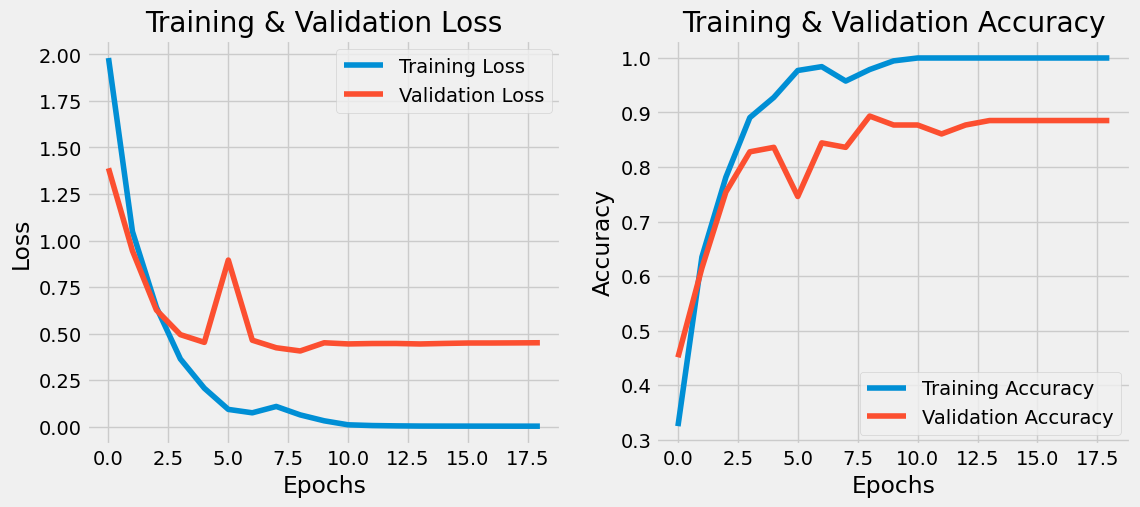

In [ ]:
# Extract loss and accuracy values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['acc']
val_acc = history.history['val_acc']

# Plot Training & Validation Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()


In [ ]:
preds  = cnn_model.predict(test_gen)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


In [ ]:
y_pred = np.argmax(preds, axis=1)
y_pred

array([4, 3, 0, 5, 2, 0, 5, 3, 1, 2, 5, 1, 5, 0, 4, 1, 5, 2, 3, 5, 2, 3,
       4, 3, 4, 0, 1, 3, 1, 1, 2, 0, 4, 3, 2, 5, 5, 5, 0, 2, 3, 0, 5, 5,
       5, 4, 4, 5, 5, 3, 5, 3, 1, 0, 5, 3, 4, 5, 3, 2, 1, 2, 1, 5, 5, 0,
       4, 4, 0, 4, 2, 2, 1, 0, 2, 1, 1, 2, 4, 1, 0, 4, 2, 0, 4, 1, 0, 2,
       0, 3, 4, 5, 4, 1, 3, 0, 1, 5, 0, 4, 0, 3, 1, 4, 4, 3, 3, 0, 4, 3,
       1, 4, 2, 1, 1, 5, 1, 4, 5, 5, 3, 1])

In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())
print(classes)

['AMERICAN GOLDFINCH', 'BARN OWL', 'CARMINE BEE-EATER', 'DOWNY WOODPECKER', 'EMPEROR PENGUIN', 'FLAMINGO']


In [ ]:
g_dict

{'AMERICAN GOLDFINCH': 0,
 'BARN OWL': 1,
 'CARMINE BEE-EATER': 2,
 'DOWNY WOODPECKER': 3,
 'EMPEROR PENGUIN': 4,
 'FLAMINGO': 5}

In [ ]:
# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
cm

array([[18,  3,  0,  0,  0,  0],
       [ 0, 17,  0,  0,  0,  3],
       [ 0,  0, 16,  0,  2,  2],
       [ 0,  1,  0, 19,  0,  0],
       [ 0,  0,  0,  0, 20,  1],
       [ 1,  1,  0,  0,  0, 18]])

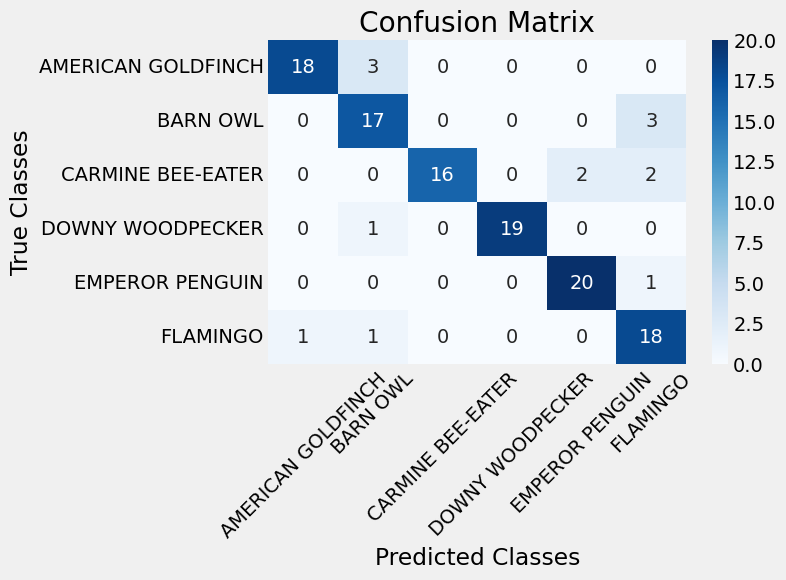

In [ ]:
# Create a heat map
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)

# Add a title and label the axes
plt.title('Confusion Matrix')
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')

# Modify the rotation of axis labels
plt.xticks(rotation=45)  # Rotation of x-axis labels
plt.yticks(rotation=0)   # Rotation of y-axis labels

plt.show()

In [ ]:
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

                    precision    recall  f1-score   support

AMERICAN GOLDFINCH       0.95      0.86      0.90        21
          BARN OWL       0.77      0.85      0.81        20
 CARMINE BEE-EATER       1.00      0.80      0.89        20
  DOWNY WOODPECKER       1.00      0.95      0.97        20
   EMPEROR PENGUIN       0.91      0.95      0.93        21
          FLAMINGO       0.75      0.90      0.82        20

          accuracy                           0.89       122
         macro avg       0.90      0.88      0.89       122
      weighted avg       0.90      0.89      0.89       122



# Evaluate model

In [ ]:
train_score = cnn_model.evaluate(train_gen, verbose= 1)
valid_score = cnn_model.evaluate(valid_gen, verbose= 1)
test_score = cnn_model.evaluate(test_gen, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Valid Loss: ", valid_score[0])
print("Valid Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - acc: 0.9971 - loss: 0.0209
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - acc: 0.8764 - loss: 0.4380
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.9053 - loss: 0.1912
Train Loss:  0.022893065586686134
Train Accuracy:  0.9964726567268372
--------------------
Valid Loss:  0.40625059604644775
Valid Accuracy:  0.8934426307678223
--------------------
Test Loss:  0.245857372879982
Test Accuracy:  0.8852459192276001


In [ ]:
images, labels = next(test_gen)

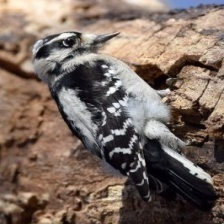

In [ ]:
# Plotting image to compare
img = array_to_img(images[7])
img

In [ ]:
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",classes[np.argmax(labels[7])])
print("Predicted : ",classes[np.argmax(preds[7])])

Originally :  DOWNY WOODPECKER
Predicted :  DOWNY WOODPECKER
